In [13]:
pip install kagglehub


     -------------------------------------- 51.9/51.9 KB 906.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\surug\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hayder17/breast-cancer-detection")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 87.2M/87.2M [00:04<00:00, 20.3MB/s]

Extracting files...


Path to dataset files: C:\Users\surug\.cache\kagglehub\datasets\hayder17\breast-cancer-detection\versions\1


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import random
import tqdm
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D,Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [19]:
train_data_path = "C:/Users/surug/.cache/kagglehub/datasets/hayder17/breast-cancer-detection/versions/1/train"
test_data_path = "C:/Users/surug/.cache/kagglehub/datasets/hayder17/breast-cancer-detection/versions/1/test"
val_data_path = "C:/Users/surug/.cache/kagglehub/datasets/hayder17/breast-cancer-detection/versions/1/valid"

In [20]:
categories = ["0", "1"]
train_data = []
for category in categories:
    category_path = os.path.join(train_data_path, category)
    index = categories.index(category)
    for image in tqdm.tqdm(os.listdir(category_path)):
        img_path = os.path.join(category_path, image)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        train_data.append([img, index])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 803/803 [00:13<00:00, 61.26it/s]


In [22]:
#print(len(train_data))
len(train_data)

2372

In [23]:
categories = ["0", "1"]
test_data = []
for category in categories:
    category_path = os.path.join(test_data_path, category)
    index = categories.index(category)
    for image in tqdm.tqdm(os.listdir(category_path)):
        img_path = os.path.join(category_path, image)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        test_data.append([img, index])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 67.98it/s]


In [24]:
len(test_data)

336

In [25]:
categories = ["0", "1"]
val_data = []
for category in categories:
    category_path = os.path.join(val_data_path, category)
    index = categories.index(category)
    for image in tqdm.tqdm(os.listdir(category_path)):
        img_path = os.path.join(category_path, image)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        val_data.append([img, index])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:03<00:00, 62.15it/s]


In [26]:
len(val_data)

675

In [27]:
random.shuffle(train_data)
random.shuffle(test_data)
random.shuffle(val_data)

In [28]:
x_train_list = []
y_train_list = []
for image, label in train_data:
    x_train_list.append(image)
    y_train_list.append(label)
    
x_train = np.array(x_train_list)/255
y_train = np.array(y_train_list)

In [29]:
x_train.shape

(2372, 224, 224, 3)

In [30]:
x_test_list = []
y_test_list = []
for image, label in test_data:
    x_test_list.append(image)
    y_test_list.append(label)
    
x_test = np.array(x_test_list)/255
y_test = np.array(y_test_list)

In [31]:
x_test.shape

(336, 224, 224, 3)

In [32]:
y_test.shape

(336,)

In [33]:
x_val_list = []
y_val_list = []
for image, label in val_data:
    x_val_list.append(image)
    y_val_list.append(label)
    
x_val = np.array(x_val_list)/255
y_val = np.array(y_val_list)

In [34]:
x_val.shape

(675, 224, 224, 3)

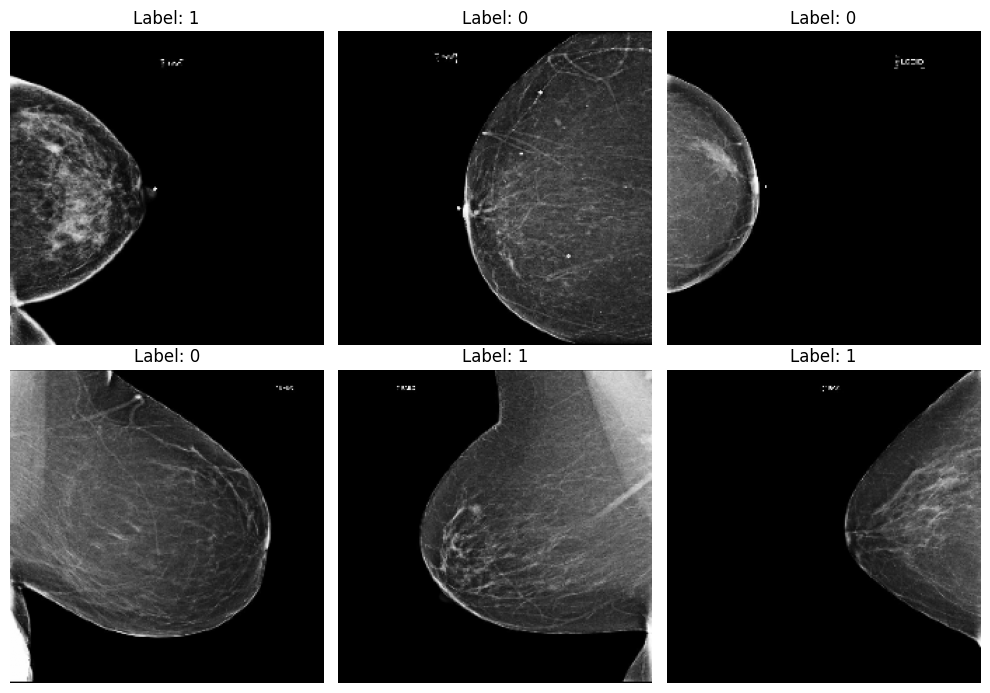

In [35]:
num_images = 6


random_indices = np.random.choice(len(x_train), num_images, replace=False)


fig, axes = plt.subplots(2, 3, figsize=(10, 7))


for i, idx in enumerate(random_indices):
    ax = axes[i // 3, i % 3]  
    ax.imshow(x_train[idx], cmap='gray')  
    ax.set_title(f"Label: {y_train[idx]}")  
    ax.axis('off')


plt.tight_layout()
plt.show()

In [36]:
model = Sequential()

model.add(Conv2D(100,(3, 3), activation = "relu", input_shape = (224, 224, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(100,(3, 3), activation = "relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64,(3, 3), activation = "relu"))
#model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64,(3, 3), activation = "relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(.2))
#model.add(Dense(32, activation = "relu"))
model.add(Dropout(.3))
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\surug\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 100)       │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 100)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 100)       │          90,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          57,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 40000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,560,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,749,669 (10.49 MB)

 Trainable params: 2,749,669 (10.49 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history = model.fit(x_train, y_train, epochs = 20, validation_data=(x_val, y_val), verbose= 1)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6641 - loss: 0.6584 - val_accuracy: 0.6652 - val_loss: 0.6411
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6521 - loss: 0.6321 - val_accuracy: 0.6696 - val_loss: 0.6259
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6794 - loss: 0.6165 - val_accuracy: 0.6563 - val_loss: 0.6215
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.6762 - loss: 0.6180 - val_accuracy: 0.6578 - val_loss: 0.6277
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.6889 - loss: 0.5970 - val_accuracy: 0.6607 - val_loss: 0.6250
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.6987 - loss: 0.5812 - val_accuracy: 0.6711 - val_loss: 0.6199
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.7132 - loss: 0.5605 - val_accuracy: 0.6593 - val_loss: 0.6572
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.7260 - loss: 0.5276 - val_accuracy: 0.6385 - v

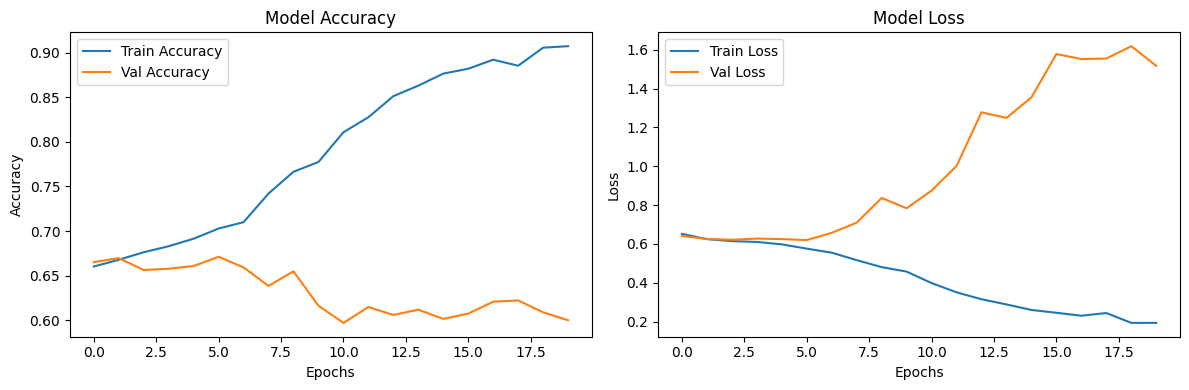

In [39]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
threshold = 0.5
y_pred = (model.predict(x_test)>= threshold).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 590ms/step


In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()